In [229]:
import pandas as pd
import numpy as np
import pprint

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

pd.options.display.max_columns = None

#import csv file
bottle_df = pd.read_csv('../week_13/bottle.csv')
cast_df = pd.read_csv('../week_13/cast.csv')

In [208]:
bottle_df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preprocessing

In [213]:
bottle_df = bottle_df.dropna(axis=1,thresh=406000)
bottle_df = bottle_df.dropna(axis=0)
bottle_df.head(10)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,T_prec,S_prec,P_qual,Chlqua,Phaqua,PO4uM,PO4q,SiO3qu,NO2q,NO3q,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PO4,R_PRES
464399,18445,464400,090.0 037.0,19-7207JD-HY-207-0648-09000370-0600A-3,600,5.94,34.335,0.40,27.042,5.7,17.393640,3,2.0,3.0,9.0,9.0,9.0,3.02,8.0,8.0,8.0,8.0,9.0,9.0,9.0,9.0,9.0,600.0,5.94,5.89,34.335,27.04,109.3,0.94,0.40,5.7,3.02,604
475924,19048,475925,126.7 003.0,19-7404AX-HY-104-0924-12670030-0121A-3,121,13.48,34.945,1.77,26.257,30.1,77.025730,3,2.0,3.0,9.0,9.0,9.0,1.14,8.0,8.0,8.0,8.0,9.0,9.0,9.0,9.0,9.0,121.0,13.48,13.46,34.945,26.25,178.9,0.26,1.77,30.1,1.14,122
475928,19048,475929,126.7 003.0,19-7404AX-HY-104-0924-12670030-0169A-3,169,13.05,34.910,1.46,26.318,24.6,63.531580,3,2.0,3.0,9.0,9.0,9.0,3.14,8.0,8.0,8.0,8.0,9.0,9.0,9.0,9.0,9.0,169.0,13.05,13.03,34.910,26.31,174.3,0.34,1.46,24.6,3.14,170
475973,19050,475974,125.0 005.0,19-7404AX-HY-104-1223-12500050-0296A-3,296,10.71,34.729,0.51,26.623,8.2,22.185940,3,2.0,3.0,9.0,9.0,9.0,2.60,8.0,8.0,8.0,8.0,9.0,9.0,9.0,9.0,9.0,296.0,10.71,10.67,34.729,26.62,147.7,0.50,0.51,8.2,2.60,298
475977,19050,475978,125.0 005.0,19-7404AX-HY-104-1223-12500050-0492A-3,492,8.55,34.625,0.33,26.904,5.0,14.351680,3,2.0,3.0,9.0,9.0,9.0,2.37,8.0,8.0,8.0,8.0,9.0,9.0,9.0,9.0,9.0,492.0,8.55,8.50,34.625,26.90,123.8,0.77,0.33,5.0,2.37,495
475995,19051,475996,124.0 006.0,19-7404AX-HY-104-1400-12400060-0197A-3,197,12.69,34.919,2.37,26.398,39.7,103.122000,3,2.0,3.0,9.0,9.0,9.0,2.40,8.0,8.0,8.0,8.0,9.0,9.0,9.0,9.0,9.0,197.0,12.69,12.66,34.919,26.39,167.5,0.37,2.37,39.7,2.40,198
475999,19051,476000,124.0 006.0,19-7404AX-HY-104-1400-12400060-0295A-3,295,11.16,34.757,0.67,26.564,10.8,29.147910,3,2.0,3.0,9.0,9.0,9.0,2.84,8.0,8.0,8.0,8.0,9.0,9.0,9.0,9.0,9.0,295.0,11.16,11.12,34.757,26.56,153.6,0.53,0.67,10.8,2.84,297
476003,19051,476004,124.0 006.0,19-7404AX-HY-104-1400-12400060-0493A-3,493,8.48,34.599,0.17,26.894,2.6,7.393363,3,2.0,3.0,9.0,9.0,9.0,2.38,8.0,8.0,8.0,8.0,9.0,9.0,9.0,9.0,9.0,493.0,8.48,8.43,34.599,26.89,124.6,0.80,0.17,2.6,2.38,496
476530,19070,476531,123.3 007.0,19-7404AX-HY-109-2220-12330070-0172A-3,172,12.38,34.905,2.27,26.447,37.8,98.766130,3,2.0,3.0,9.0,9.0,9.0,2.24,8.0,8.0,8.0,8.0,9.0,9.0,9.0,9.0,9.0,172.0,12.38,12.36,34.905,26.44,162.0,0.29,2.27,37.8,2.24,173
476535,19070,476536,123.3 007.0,19-7404AX-HY-109-2220-12330070-0269A-3,269,11.62,34.854,1.83,26.555,29.9,79.613660,3,2.0,3.0,9.0,9.0,9.0,2.47,8.0,8.0,8.0,8.0,9.0,9.0,9.0,9.0,9.0,269.0,11.62,11.59,34.854,26.55,154.1,0.45,1.83,29.9,2.47,271


In [214]:
bottle_df = bottle_df.drop(bottle_df.loc[:,'PO4q':'R_PRES'].columns, axis=1)
bottle_df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,T_prec,S_prec,P_qual,Chlqua,Phaqua,PO4uM
464399,18445,464400,090.0 037.0,19-7207JD-HY-207-0648-09000370-0600A-3,600,5.94,34.335,0.40,27.042,5.7,17.39364,3,2.0,3.0,9.0,9.0,9.0,3.02
475924,19048,475925,126.7 003.0,19-7404AX-HY-104-0924-12670030-0121A-3,121,13.48,34.945,1.77,26.257,30.1,77.02573,3,2.0,3.0,9.0,9.0,9.0,1.14
475928,19048,475929,126.7 003.0,19-7404AX-HY-104-0924-12670030-0169A-3,169,13.05,34.910,1.46,26.318,24.6,63.53158,3,2.0,3.0,9.0,9.0,9.0,3.14
475973,19050,475974,125.0 005.0,19-7404AX-HY-104-1223-12500050-0296A-3,296,10.71,34.729,0.51,26.623,8.2,22.18594,3,2.0,3.0,9.0,9.0,9.0,2.60
475977,19050,475978,125.0 005.0,19-7404AX-HY-104-1223-12500050-0492A-3,492,8.55,34.625,0.33,26.904,5.0,14.35168,3,2.0,3.0,9.0,9.0,9.0,2.37


In [216]:
bottle_df = bottle_df.drop(['RecInd','T_prec','S_prec','P_qual','Chlqua','Phaqua'],axis=1)
bottle_df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,PO4uM
464399,18445,464400,090.0 037.0,19-7207JD-HY-207-0648-09000370-0600A-3,600,5.94,34.335,0.40,27.042,5.7,17.39364,3.02
475924,19048,475925,126.7 003.0,19-7404AX-HY-104-0924-12670030-0121A-3,121,13.48,34.945,1.77,26.257,30.1,77.02573,1.14
475928,19048,475929,126.7 003.0,19-7404AX-HY-104-0924-12670030-0169A-3,169,13.05,34.910,1.46,26.318,24.6,63.53158,3.14
475973,19050,475974,125.0 005.0,19-7404AX-HY-104-1223-12500050-0296A-3,296,10.71,34.729,0.51,26.623,8.2,22.18594,2.60
475977,19050,475978,125.0 005.0,19-7404AX-HY-104-1223-12500050-0492A-3,492,8.55,34.625,0.33,26.904,5.0,14.35168,2.37


In [217]:
X_train = np.array(bottle_df.iloc[:,4:])
#bottle_df.iloc[:,4:]
scaler = preprocessing.StandardScaler().fit(X_train)
scaler.mean_
scaler.scale_
X_scaled = scaler.transform(X_train)
print(X_scaled)

[[ 1.10653366 -1.74678539 -2.38920679 -1.03827832  1.35267559 -1.05986387
  -1.03833586  1.00664619]
 [-0.75695572  0.88887307  0.82298244  0.29377373 -0.97193813  0.31413802
   0.29394276 -2.31768601]
 [-0.57021775  0.73856363  0.6386765  -0.00763951 -0.79129936  0.00442448
  -0.00753866  1.2188376 ]
 [-0.07614019 -0.07939934 -0.3144485  -0.93132523  0.11189451 -0.91908499
  -0.93126802  0.26397623]
 [ 0.68637321 -0.83444208 -0.86210043 -1.10633937  0.94401738 -1.09928196
  -1.10629823 -0.14272399]
 [-0.46128726  0.61272318  0.68606946  0.87715419 -0.55439605  0.85472893
   0.8769762  -0.08967613]
 [-0.08003056  0.07790124 -0.16700375 -0.77575711 -0.06282168 -0.77267495
  -0.7757262   0.68835906]
 [ 0.69026359 -0.85891105 -0.99901342 -1.26190749  0.91440447 -1.23442969
  -1.26175844 -0.12504137]
 [-0.55854662  0.50436056  0.61234708  0.77992411 -0.40929277  0.74773698
   0.77965893 -0.37259802]
 [-0.1811803   0.23869737  0.343787    0.35211178 -0.0894733   0.30287571
   0.35176136  0.

In [218]:
bottle_scaled = pd.DataFrame(X_scaled, columns = bottle_df.columns[4:])
bottle_scaled.head()

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,PO4uM
0,1.106534,-1.746785,-2.389207,-1.038278,1.352676,-1.059864,-1.038336,1.006646
1,-0.756956,0.888873,0.822982,0.293774,-0.971938,0.314138,0.293943,-2.317686
2,-0.570218,0.738564,0.638676,-0.007640,-0.791299,0.004424,-0.007539,1.218838
3,-0.076140,-0.079399,-0.314449,-0.931325,0.111895,-0.919085,-0.931268,0.263976
4,0.686373,-0.834442,-0.862100,-1.106339,0.944017,-1.099282,-1.106298,-0.142724


In [219]:
bottle_scaled = bottle_scaled.drop(['O2Sat','STheta','Oxy_µmol/Kg'],axis=1)
bottle_scaled.head()

,Depthm,T_degC,Salnty,O2ml_L,PO4uM
0,1.106534,-1.746785,-2.389207,-1.038278,1.006646
1,-0.756956,0.888873,0.822982,0.293774,-2.317686
2,-0.570218,0.738564,0.638676,-0.007640,1.218838
3,-0.076140,-0.079399,-0.314449,-0.931325,0.263976
4,0.686373,-0.834442,-0.862100,-1.106339,-0.142724


In [221]:
bottle_scaled.iloc[:,1:5]

,T_degC,Salnty,O2ml_L,PO4uM
0,-1.746785,-2.389207,-1.038278,1.006646
1,0.888873,0.822982,0.293774,-2.317686
2,0.738564,0.638676,-0.007640,1.218838
3,-0.079399,-0.314449,-0.931325,0.263976
4,-0.834442,-0.862100,-1.106339,-0.142724
5,0.612723,0.686069,0.877154,-0.089676
6,0.077901,-0.167004,-0.775757,0.688359
7,-0.858911,-0.999013,-1.261907,-0.125041
8,0.504361,0.612347,0.779924,-0.372598
9,0.238697,0.343787,0.352112,0.034102


## Feature Selection

In [222]:
from sklearn.feature_selection import RFE

X = np.array(bottle_scaled.iloc[:,1:5])
y = np.array(bottle_scaled.iloc[:,0])

estimator = LinearRegression()
selector = RFE(estimator,n_features_to_select=3,step=1)
selector = selector.fit(X,y)

print(selector.support_)
print(selector.ranking_)

[ True  True  True False]
[1 1 1 2]


#### Features being used are: T_degC, Salnty, and O2ml_L. 

In [223]:
#Multiple linear regression using sklearn

regression=LinearRegression()
regression.fit(X,y)

y_pred = regression.predict(X)
accuracy_score = regression.score(X,y)
print(accuracy_score)

0.9923077442264823


In [224]:
regression.coef_

array([-1.61226772,  0.79224901, -0.11843204,  0.00796037])

3.	Perform multiple linear regression on the dataset. Be sure to display the final resulting equation with the coefficients and intercept in markdown.

-1.6 * TdegC + 0.792 * Salnty - 0.118 * O2ml_L + 0.00796 * PO4uM - 2.97x10^-14

In [227]:
from statsmodels.formula.api import ols

#no interaction
bottle_all_depth_T = ols("Depthm ~ T_degC + Salnty + O2ml_L + PO4uM", data = bottle_scaled).fit()
print(bottle_all_depth_T.params)

Intercept   -2.972622e-14
T_degC      -1.612268e+00
Salnty       7.922490e-01
O2ml_L      -1.184320e-01
PO4uM        7.960372e-03
dtype: float64


4.	Which regression approach had the “best” performance? Be sure to compare it to what you did last week.
The multiple linear regression approach has the best performance, my accuracy score for multiple linear regression was around 99%. When using linear regression, for only two variables, last week, the accuracy score was 17%. 

5.	Work with the diabetes dataset to perform multiple logistic regression. Look at the documentation for logistic regression in statsmodel and/or sklearn and see if you can tune the model performance based on available parameters. 

In [141]:
diabetes_df = pd.read_csv("../week_13/diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [231]:
from statsmodels.formula.api import logit

X = np.array(diabetes_df.iloc[:,0:8])
y = np.array(diabetes_df.iloc[:,8])

model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X,y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 4 5 6 1 1 3]


#### Top 3 features are Pregnancies, BMI, and DiabetesPedigreeFunction

In [265]:
Xtest = diabetes_df[['Pregnancies', 'Glucose','BMI','DiabetesPedigreeFunction']]
ytest = diabetes_df['Outcome']

from time import perf_counter

start = perf_counter()

logreg = logit("Outcome ~ Pregnancies + Glucose + BMI + DiabetesPedigreeFunction", data = diabetes_df).fit()
print(logreg.params)
stop = perf_counter()

print("Elasped Time: ", stop-start)

Optimization terminated successfully.
         Current function value: 0.478064
         Iterations 6
Intercept                  -8.415851
Pregnancies                 0.141926
Glucose                     0.033826
BMI                         0.078097
DiabetesPedigreeFunction    0.901294
dtype: float64
Elasped Time:  0.41217298098490573


In [261]:
ypredict = logreg.predict(Xtest)
prediction = list(map(round,ypredict))

In [262]:
from sklearn.metrics import (confusion_matrix, accuracy_score)
from sklearn import metrics 

cm = confusion_matrix(ytest, prediction)
print('Confusion Matrix: \n', cm)

acc = accuracy_score(ytest, prediction)
print("Accuracy score: ", acc)

Confusion Matrix: 
 [[442  58]
 [117 151]]
Accuracy score:  0.7721354166666666


(<Figure size 432x288 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.6478026533996684, 0.881063122923588),
  ('0', '1'): (0.0,
   0.8843853820598006,
   0.6478026533996684,
   0.11561461794019932),
  ('1', '0'): (0.6527777777777778, 0.0, 0.3472222222222223, 0.43511677492934),
  ('1', '1'): (0.6527777777777778,
   0.4384390340655526,
   0.3472222222222223,
   0.5615609659344474)})

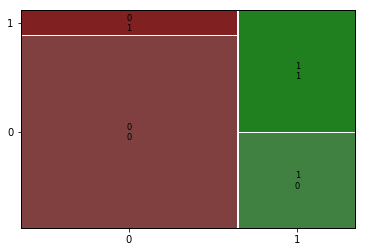

In [263]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(cm)

In [264]:
print("Accuracy:",metrics.accuracy_score(ytest, prediction))
print("Precision:",metrics.precision_score(ytest, prediction))
print("Recall:",metrics.recall_score(ytest, prediction))

Accuracy: 0.7721354166666666
Precision: 0.722488038277512
Recall: 0.5634328358208955


6.	What are the other ways to assess the performance of the model besides accuracy? What approach makes the most sense with the diabetes dataset? Why?

Another way to assess the performance of the model is also by precision - precision tells how often the model is correct. The confusion matrix is another way. The ROC curve also shows the true positive rate against the false positive rate. The confusion matrix makes the most sense because the diabetes dataset is a binary classification problem - so it's the easiest way to see how accurate the model is. 

7.	Is the KNN model or the multiple logistic regression model more performant for the diabetes dataset? How can you tell?

The multiple logistic regression model is more performant because the accuracy score is higher and the fact that the multiple logistic regression is taking in multiple variables rather than just one. 